In [28]:
import tensorflow as tf
from tensorflow import keras
from sklearn.manifold import TSNE
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D
from tensorflow.keras.layers import Dense, Activation, Flatten

In [29]:
import keras
from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

11490434/11490434 [==============================] - 0s 0us/step
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [30]:
lenet_model = Sequential()
lenet_model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(28,28,1)))
lenet_model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
lenet_model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
lenet_model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
lenet_model.add(Flatten())
lenet_model.add(Dense(units=120, activation='relu'))
lenet_model.add(Dense(units=84, activation='relu'))
lenet_model.add(Dense(units=10, activation = 'softmax'))

In [31]:
lenet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 120)               3

In [32]:
train_y = tf.keras.utils.to_categorical(train_y, num_classes=10)
test_y = tf.keras.utils.to_categorical(test_y, num_classes=10)

In [33]:
from sklearn.model_selection import train_test_split
train_X, X_val, train_y, y_val = train_test_split(train_X, train_y, test_size=0.2, random_state=1)

In [34]:
train_y[0].shape

(10,)

In [35]:
hist=[]
results=[]

In [36]:
from keras.optimizers import SGD,Adam

opt_list=[SGD(lr=0.01),Adam(lr=0.001)]
epochs_list = [10,20,30]
for optimizer in  opt_list:
  for epoch in epochs_list:

    lenet_model.compile(optimizer=optimizer, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
    history = lenet_model.fit(
      train_X,
      train_y,
      batch_size=64,
      epochs=epoch,
      validation_data=(X_val, y_val)
    )
    hist.append(history.history)
    results.append(lenet_model.evaluate(test_X, test_y, batch_size=128))

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)
/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
750/750 [==============================] - 12s 4ms/step - loss: 0.9095 - accuracy: 0.7165 - val_loss: 0.2484 - val_accuracy: 0.9235
Epoch 2/10
750/750 [==============================] - 3s 4ms/step - loss: 0.2108 - accuracy: 0.9339 - val_loss: 0.1719 - val_accuracy: 0.9477
Epoch 3/10
750/750 [==============================] - 3s 4ms/step - loss: 0.1462 - accuracy: 0.9540 - val_loss: 0.1625 - val_accuracy: 0.9500
Epoch 4/10
750/750 [==============================] - 3s 4ms/step - loss: 0.1174 - accuracy: 0.9634 - val_loss: 0.1218 - val_accuracy: 0.9618
Epoch 5/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0982 - accuracy: 0.9690 - val_loss: 0.1331 - val_accuracy: 0.9603
Epoch 6/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0856 - accuracy: 0.9726 - val_loss: 0.1069 - val_accuracy: 0.9697
Epoch 7/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0742 - accuracy: 0.9764 - val_loss: 0.1048 - val_accuracy: 0.9684
Epoch

In [37]:
hist

[{'loss': [0.9094891548156738,
   0.21083930134773254,
   0.1462499499320984,
   0.11736223101615906,
   0.09821033477783203,
   0.08560695499181747,
   0.07423967123031616,
   0.06561494618654251,
   0.059747666120529175,
   0.054159920662641525],
  'accuracy': [0.7164583206176758,
   0.9339374899864197,
   0.9540416598320007,
   0.9633541703224182,
   0.9690208435058594,
   0.9726458191871643,
   0.976395845413208,
   0.9793958067893982,
   0.981041669845581,
   0.9827708601951599],
  'val_loss': [0.24840928614139557,
   0.17192110419273376,
   0.1624920517206192,
   0.12180940061807632,
   0.13313020765781403,
   0.1068834513425827,
   0.10484051704406738,
   0.10085491836071014,
   0.10108466446399689,
   0.11284573376178741],
  'val_accuracy': [0.9235000014305115,
   0.9477499723434448,
   0.949999988079071,
   0.9618333578109741,
   0.9602500200271606,
   0.9697499871253967,
   0.968416690826416,
   0.9698333144187927,
   0.9709166884422302,
   0.9680833220481873]},
 {'loss': [0.

In [38]:
results

[[0.10763237625360489, 0.9685999751091003],
 [0.11068291962146759, 0.9790999889373779],
 [0.13105225563049316, 0.9822999835014343],
 [0.12794391810894012, 0.9715999960899353],
 [0.13108639419078827, 0.9835000038146973],
 [0.18725170195102692, 0.9805999994277954]]

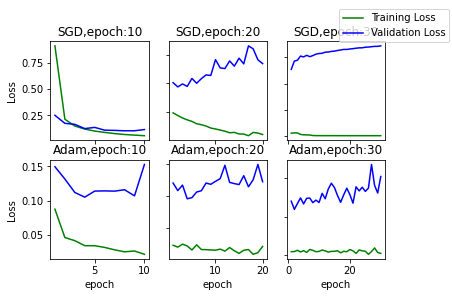

In [43]:
fig, axs = plt.subplots(2, 3)
epoch1=range(1,11)
epoch2 = range(1,21)
epoch3 = range(1,31)


axs[0, 0].set_title('SGD,epoch:10')
axs[0, 0].plot(epoch1,hist[0]['loss'],color="green",label="Training Loss")
axs[0, 0].plot(epoch1,hist[0]['val_loss'],color="blue",label = "Validation Loss")

axs[0, 1].set_title('SGD,epoch:20')
axs[0, 1].plot(epoch2,hist[1]['loss'],color="green")
axs[0, 1].plot(epoch2,hist[1]['val_loss'],color="blue")

axs[0, 2].set_title('SGD,epoch:30')
axs[0, 2].plot(epoch3,hist[2]['loss'],color="green")
axs[0, 2].plot(epoch3,hist[2]['val_loss'],color="blue")

axs[1, 0].set_title('Adam,epoch:10')
axs[1, 0].plot(epoch1,hist[3]['loss'],color="green")
axs[1, 0].plot(epoch1,hist[3]['val_loss'],color="blue")

axs[1, 1].set_title('Adam,epoch:20')
axs[1, 1].plot(epoch2,hist[4]['loss'],color="green")
axs[1, 1].plot(epoch2,hist[4]['val_loss'],color="blue")


axs[1, 2].set_title('Adam,epoch:30')
axs[1, 2].plot(epoch3,hist[5]['loss'],color="green")
axs[1, 2].plot(epoch3,hist[5]['val_loss'],color="blue")
  

for ax in axs.flat:
    ax.set(xlabel='epoch', ylabel='Loss')

fig.legend(bbox_to_anchor=(1.04, 1), borderaxespad=0)


# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

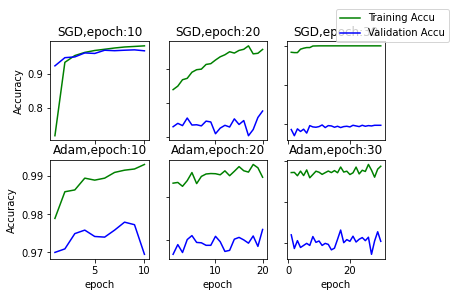

In [46]:
fig, axs = plt.subplots(2, 3)
epoch1=range(1,11)
epoch2 = range(1,21)
epoch3 = range(1,31)

axs[0, 0].set_title('SGD,epoch:10')
axs[0, 0].plot(epoch1,hist[0]['accuracy'],color="green",label="Training Accu")
axs[0, 0].plot(epoch1,hist[0]['val_accuracy'],color="blue",label = "Validation Accu")

axs[0, 1].set_title('SGD,epoch:20' )
axs[0, 1].plot(epoch2,hist[1]['accuracy'],color="green")
axs[0, 1].plot(epoch2,hist[1]['val_accuracy'],color="blue")

axs[0, 2].set_title('SGD,epoch:30')
axs[0, 2].plot(epoch3,hist[2]['accuracy'],color="green")
axs[0, 2].plot(epoch3,hist[2]['val_accuracy'],color="blue")



axs[1, 0].set_title('Adam,epoch:10')
axs[1, 0].plot(epoch1,hist[3]['accuracy'],color="green")
axs[1, 0].plot(epoch1,hist[3]['val_accuracy'],color="blue")

axs[1, 1].set_title('Adam,epoch:20')
axs[1, 1].plot(epoch2,hist[4]['accuracy'],color="green")
axs[1, 1].plot(epoch2,hist[4]['val_accuracy'],color="blue")


axs[1, 2].set_title('Adam,epoch:30')
axs[1, 2].plot(epoch3,hist[5]['accuracy'],color="green")
axs[1, 2].plot(epoch3,hist[5]['val_accuracy'],color="blue")


for ax in axs.flat:
    ax.set(xlabel='epoch', ylabel='Accuracy')
    
fig.legend(bbox_to_anchor=(1.04, 1), borderaxespad=0)


# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [ ]:
from keras.datasets import fashion_mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [ ]:
x_train.shape
y_train.shape
print('X_train: ' + str(x_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(x_test.shape))
print('Y_test:  '  + str(y_test.shape))